<a href="https://colab.research.google.com/github/ThePhoenix0001/Machine-learning-projects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

loading already present mnist dataset from tensorflow

In [ ]:
mnist=tf.keras.datasets.mnist

Dividing trianing and test set

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

Checking whether the image is color or b/w.
And converting it into b/w.

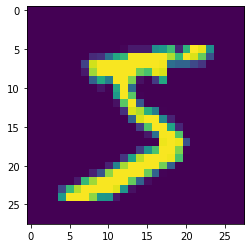

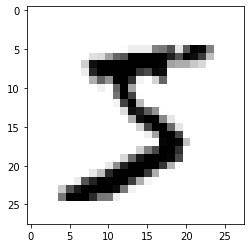

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing traning and test set

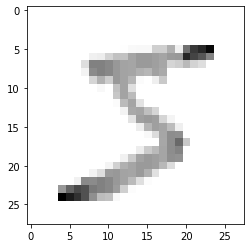

In [ ]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
image_size=28
x_train_re=np.array(x_train).reshape(-1, image_size, image_size, 1)
x_test_re=np.array(x_test).reshape(-1, image_size, image_size, 1)
print(x_train_re.shape)
print(x_test_re.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Creating the neural networks.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model= Sequential()
#First layer
model.add(Conv2D(64, (3,3), input_shape=x_train_re.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer
model.add(Conv2D(64, (3,3), input_shape=x_train_re.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(64, (3,3), input_shape=x_train_re.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#First fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Second fully connected layer
model.add(Dense(32))
model.add(Activation("relu"))

#Third fully connected layer
model.add(Dense(10))# 10 because total number of classes are 10
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print(len(x_train_re))

60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(x_train_re,y_train,epochs=5, batch_size=1, validation_split=0.3)

Epoch 1/5
42000/42000 [==============================] - 284s 7ms/step - loss: 0.2328 - accuracy: 0.9309 - val_loss: 0.1087 - val_accuracy: 0.9676
Epoch 2/5
42000/42000 [==============================] - 293s 7ms/step - loss: 0.1158 - accuracy: 0.9685 - val_loss: 0.1376 - val_accuracy: 0.9646
Epoch 3/5
42000/42000 [==============================] - 292s 7ms/step - loss: 0.1036 - accuracy: 0.9735 - val_loss: 0.0868 - val_accuracy: 0.9756
Epoch 4/5
42000/42000 [==============================] - 290s 7ms/step - loss: 0.0995 - accuracy: 0.9758 - val_loss: 0.1457 - val_accuracy: 0.9706
Epoch 5/5
42000/42000 [==============================] - 279s 7ms/step - loss: 0.0951 - accuracy: 0.9772 - val_loss: 0.1055 - val_accuracy: 0.9753


Testing on test set

In [ ]:
test_loss, test_acc=model.evaluate(x_test_re, y_test,batch_size=1)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 34s 3ms/step - loss: 0.1036 - accuracy: 0.9769
0.10364118963479996
0.9768999814987183


In [ ]:
prediction=model.predict([x_test_re], batch_size=1)

10000/10000 [==============================] - 27s 3ms/step


In [ ]:
print(prediction)

[[1.14955227e-25 1.18981959e-22 1.29982897e-17 ... 1.00000000e+00
  1.00555177e-20 4.83529503e-13]
 [1.07269756e-10 2.37894843e-10 9.99998808e-01 ... 1.50437940e-09
  2.60989234e-12 1.99970384e-16]
 [1.22568256e-13 1.00000000e+00 2.12871691e-12 ... 1.13983805e-11
  2.29429573e-10 6.55008461e-16]
 ...
 [1.24393694e-29 8.53311662e-31 6.13937665e-24 ... 1.35841552e-25
  1.25638072e-19 7.92283203e-21]
 [3.91202537e-09 3.54166661e-11 1.28813116e-09 ... 5.85333726e-11
  1.10498036e-03 3.82550894e-07]
 [1.73183032e-08 3.41947598e-17 5.56680930e-18 ... 2.69796554e-27
  3.40859028e-16 3.21038287e-21]]


In [ ]:
print(np.argmax(prediction[965]))

6


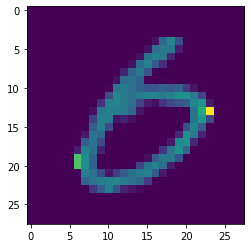

In [ ]:
plt.imshow(x_test[965])

In [ ]:
img=cv2.imread('/content/drive/MyDrive/datasets/PNG/one.png')

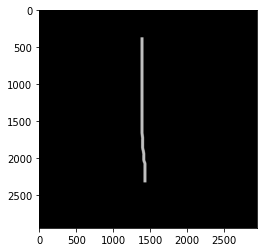

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(2945, 2948, 3)

In [ ]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_img.shape

(2945, 2948)

In [ ]:
resized_img=cv2.resize(gray_img,(28,28), interpolation=cv2.INTER_AREA)

In [ ]:
resized_img.shape

(28, 28)

In [ ]:
norm_img=tf.keras.utils.normalize(resized_img, axis=1)

In [ ]:
norm_img=np.array(norm_img).reshape(-1, image_size, image_size, 1)

In [ ]:
norm_img.shape

(1, 28, 28, 1)

In [ ]:
prediction=model.predict(norm_img)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(np.argmax(prediction))

1
